In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
#https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d
#https://www.section.io/engineering-education/support-vector-regression-in-python/



In [2]:
#https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/final_time_series.csv')
df = df.set_index('date')
df = df[['T10YIE','unemp','int_rate','michigan_sentiment','overall_sentiment_score','overall_attention_score']]
df

,T10YIE,unemp,int_rate,michigan_sentiment,overall_sentiment_score,overall_attention_score
date,,,,,,
12/05/2021,2.540000,5.5,0.06,82.9,26.4459,3.900597
13/05/2021,2.510000,5.5,0.06,82.9,51.3641,2.348224
14/05/2021,2.510000,5.5,0.06,82.9,48.4431,1.156789
15/05/2021,2.521818,5.5,0.06,82.9,17.4456,0.903695
16/05/2021,2.521818,5.5,0.06,82.9,28.1433,0.947890
...,...,...,...,...,...,...
27/05/2022,2.630000,3.4,0.83,58.4,8.4403,2.447695
28/05/2022,2.521818,3.4,0.83,58.4,18.5019,2.114690
29/05/2022,2.521818,3.4,0.83,58.4,24.0466,1.742053


In [11]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset

X_train = df.iloc[:365,1:].values.astype(float)
y_train = df.iloc[:365,0].values.astype(float)

X_test = df.iloc[365:,1:].values.astype(float)
y_test = df.iloc[365:,0].values.astype(float)

In [12]:
y = y_train.reshape(-1,1)
y

array([[2.54      ],
       [2.51      ],
       [2.51      ],
       [2.52181818],
       [2.52181818],
       [2.54      ],
       [2.52      ],
       [2.48      ],
       [2.41      ],
       [2.43      ],
       [2.52181818],
       [2.52181818],
       [2.44      ],
       [2.42      ],
       [2.4       ],
       [2.42      ],
       [2.42      ],
       [2.52181818],
       [2.52181818],
       [2.52181818],
       [2.46      ],
       [2.44      ],
       [2.42      ],
       [2.4       ],
       [2.52181818],
       [2.52181818],
       [2.39      ],
       [2.36      ],
       [2.32      ],
       [2.35      ],
       [2.32      ],
       [2.52181818],
       [2.52181818],
       [2.36      ],
       [2.38      ],
       [2.32      ],
       [2.27      ],
       [2.24      ],
       [2.52181818],
       [2.52181818],
       [2.25      ],
       [2.31      ],
       [2.34      ],
       [2.3       ],
       [2.34      ],
       [2.52181818],
       [2.52181818],
       [2.33 

In [13]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = y_train.reshape(-1,1)
y = sc_y.fit_transform(y)

In [18]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
y_pred = regressor.predict(X_test)
y_pred = y_pred.reshape(1,-1)
y_pred = sc_y.inverse_transform(y_pred)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
y_pred

array([[2.63659665, 2.63659665, 2.63659665, 2.63659665, 2.63659665,
        2.63659665, 2.63659665, 2.63659665, 2.63659665, 2.63659665,
        2.63659665, 2.63659665, 2.63659665, 2.63659665, 2.63659665,
        2.63659665, 2.63659665, 2.63659665, 2.63659665, 2.63659665]])

In [30]:
y_pred1 = []

for i in y_pred:
    for j in i:
        y_pred1.append(j)
        
y_pred1

[2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444,
 2.6365966492794444]

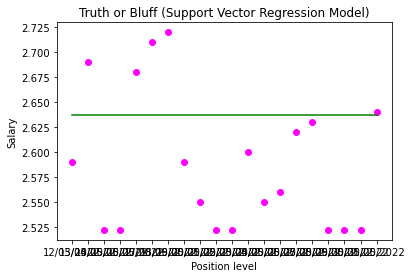

In [32]:
plt.scatter(df.iloc[365:,1:].index, y_test, color = 'magenta')
plt.plot(df.iloc[365:,1:].index, y_pred1, color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()